In [5]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import my_functions
import string
import ast

### Movie Budget Data Frame

In [2]:
#read zip file into a dataframe
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budgets_df.head() #preview file

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
print(movie_budgets_df.info())
print('--------------------------------------------\n')
print(f'This data frame has {movie_budgets_df.shape[0]} records and {movie_budgets_df.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
--------------------------------------------

This data frame has 5782 records and 6 columns


In [4]:
 # bring in my function to remove punctuation of columns and test to see if it runs well
from my_functions import remove_punctuations
    
remove_punctuations('$Test')

'test'

In [5]:
#remove punctuation and lowercase all title currently the budget and gross 
#are object data types so this will remove commas and $

#Iterate over three given columns only from the dataframe



for column in movie_budgets_df[['production_budget', 'domestic_gross']]:
    movie_budgets_df[column] = movie_budgets_df[column].apply(remove_punctuations) 

In [6]:
movie_budgets_df['release_date'] = movie_budgets_df['release_date'].apply(
    lambda x: pd.to_datetime(x).strftime('%m/%d/%Y'))

#changing release date format to MM/DD/YYY

In [7]:
movie_budgets_df.drop(columns=['worldwide_gross'], inplace=True ) # drop unwanted column we only care about domestic data

In [8]:
movie_budgets_df['production_budget'] = pd.to_numeric(movie_budgets_df['production_budget']) #change data type from object to int/float
movie_budgets_df['domestic_gross'] = pd.to_numeric(movie_budgets_df['domestic_gross']) #change data type from object to int/float

movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [9]:
#adding a new column to show the profit (or lack there of) from the domestic sales
#adding a new column to show the return on cost of production

movie_budgets_df['profit'] = movie_budgets_df['domestic_gross'] - movie_budgets_df['production_budget']
movie_budgets_df['return_on_cost'] = round(movie_budgets_df['profit'] / movie_budgets_df['production_budget'],3)
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
profit               5782 non-null int64
return_on_cost       5782 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 316.3+ KB


In [10]:
movie_budgets_df.head() #5782 records x 7 columns


,id,release_date,movie,production_budget,domestic_gross,profit,return_on_cost
0,1,12/18/2009,Avatar,425000000,760507625,335507625,0.789
1,2,05/20/2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,-169536125,-0.413
2,3,06/07/2019,Dark Phoenix,350000000,42762350,-307237650,-0.878
3,4,05/01/2015,Avengers: Age of Ultron,330600000,459005868,128405868,0.388
4,5,12/15/2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,303181382,0.956


#### checking and cleaning for null values

In [11]:
movie_budgets_df.duplicated().sum()
#this checks all records in the data frame to see if any record is identical to another record
#it returns a boolean which we sum up to see if there are any duplicates
# 0 means no dulicate (exact matches) exist

0

In [12]:
movie_budgets_df.isnull().sum() 
#we have 0 null values in this data set

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
profit               0
return_on_cost       0
dtype: int64

,id,release_date,movie,production_budget,domestic_gross,profit,return_on_cost
5772,73,01/13/2012,Newlyweds,9000,4584,-4416,-0.491
5773,74,02/26/1993,El Mariachi,7000,2040920,2033920,290.560
5774,75,10/08/2004,Primer,7000,424760,417760,59.680
5775,76,05/26/2006,Cavite,7000,70071,63071,9.010
5776,77,12/31/2004,The Mongol King,7000,900,-6100,-0.871
5777,78,12/31/2018,Red 11,7000,0,-7000,-1.000
5778,79,04/02/1999,Following,6000,48482,42482,7.080
5779,80,07/13/2005,Return to the Land of Wonders,5000,1338,-3662,-0.732
5780,81,09/29/2015,A Plague So Pleasant,1400,0,-1400,-1.000
5781,82,08/05/2005,My Date With Drew,1100,181041,179941,163.583


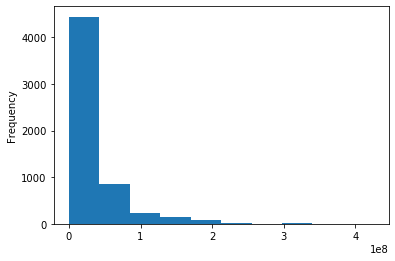

In [13]:
movie_budgets_df['production_budget'].plot(kind='hist') 
#checking to see if we have any weird values such as negative numbers or weird place holder values like 99999999
#most of the data is less than 10^8
movie_budgets_df.loc[movie_budgets_df['production_budget'] < 10000]






Looking at this data it seems that nothing stands out as weird. While a budget under 10k is strange, the data seems to be legit looking at the other columns.

,id,release_date,movie,production_budget,domestic_gross,profit,return_on_cost
194,95,12/31/2020,Moonfall,150000000,0,-150000000,-1.0
479,80,12/13/2017,Bright,90000000,0,-90000000,-1.0
480,81,12/31/2019,Army of the Dead,90000000,0,-90000000,-1.0
535,36,02/21/2020,Call of the Wild,82000000,0,-82000000,-1.0
617,18,12/31/2012,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,-77600000,-1.0
...,...,...,...,...,...,...,...
5761,62,12/31/2014,Stories of Our Lives,15000,0,-15000,-1.0
5764,65,12/31/2007,Tin Can Man,12000,0,-12000,-1.0
5771,72,05/19/2015,Family Motocross,10000,0,-10000,-1.0
5777,78,12/31/2018,Red 11,7000,0,-7000,-1.0


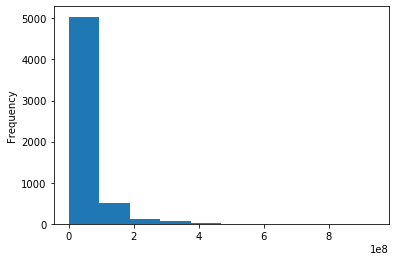

In [14]:
movie_budgets_df['domestic_gross'].plot(kind='hist') #the histogram shows no domestic gross data in the negatives
movie_budgets_df.loc[movie_budgets_df['domestic_gross'] <= 0] #548 rows where the gross is negative or 0


Looking at the histogram there are no crazy distributions such as 99999999 or something. We did find 548 values where the gross is less than or equal to 0. We know that it is impossible to have negative sales numbers and having 0 sales is very strange. This can mean a multitude of things such as the movie not hitting theaters yet (see id = 95 title = moonfall with a release date of 12/31/2020). Since there are so many different reasons as to why this can happen we will just drop the movies after the start of 2020 from the data frame.

We will leave in the rows that show 0 domestic_gross because it could be a worst case scenario showing that even though you may spend money to make a movie, there is a possiblitity that the movie never gets made.

In [15]:
movie_budgets_df.loc[(~movie_budgets_df['domestic_gross'] <= 0) & (~movie_budgets_df['release_date'].str.endswith('2020'))]
#3 movies were removed from this data frame
movie_budgets_df = movie_budgets_df.loc[(~movie_budgets_df['domestic_gross'] <= 0) & (~movie_budgets_df['release_date'].str.endswith('2020'))]

In [16]:
movie_budgets_df.loc[(movie_budgets_df['domestic_gross'] <= 0) & (movie_budgets_df['release_date'].str.endswith('2020'))]
#checking the df now and we see that those rows are gone.

,id,release_date,movie,production_budget,domestic_gross,profit,return_on_cost


# MERGING IMDB DATABASE WITH MOVIE BUDGETS

### First we will merge the movie_basic dataframe to get the unique movie id "tconst"

In [6]:
movie_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

display(movie_basics.head()) #preview file
print(movie_basics.shape)
display(movie_budgets_df.head())
print(movie_budgets_df.shape)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


(146144, 6)


NameError: name 'movie_budgets_df' is not defined

In [ ]:
def merge_imdb_to_tn(movie_title):
    try:
        genres = movie_basics.loc[movie_basics['title']==movie_title, 'genre_ids'].values[0]
     except:
            genres = None
     return genres


#### Creating a unix time column

In [27]:
movie_budgets_df['epoch_time'] = (pd.DatetimeIndex(movie_budgets_df['release_date']).astype(np.int64) // 10**9) * 1000
movie_budgets_df.values[2]

array([2, '05/20/2011', 'Pirates of the Caribbean: On Stranger Tides',
       410600000, 241063875, -169536125, -0.413, 1305849600000],
      dtype=object)

In [ ]:
movie_budgets_df['epoch_time'].plot(kind='hist')


In [8]:
movie_basics.loc[movie_basics['primary_title'].str.contains('The Last Jedi')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy"


This shows us the distrubution of our data for release dates. Unix time (or epoch time) is the number of miliseconds after 1/01/1970. We have some negative numbers here so those are dates before jan 1 1970. This may be useful data for future analysis.

### Director and Writer Info

In [ ]:
director_writer_info = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
director_writer_info.head() #preview file



### Movie Basic Info

In [ ]:
movie_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
movie_basics.head() #preview file



In [ ]:
#Iterate over three given columns only from the dataframe
for column in movie_basics[['primary_title','original_title']]:
    movie_basics[column] = movie_basics[column].apply(remove_punctuations) 

### Merging two Director and Writer info with Movie Basic Info

These two data frames have the same unique id "tconst" so it is easy to combine these data frame. This will create a dataframe with all the columns from both dataframes

In [ ]:
movies_df = movie_basics.merge(director_writer_info, on='tconst')

In [ ]:
movies_df.head()

In [ ]:
movies_df.shape
movies_df.duplicated().sum() #0
print(movies_df['primary_title'].value_counts().head(10))
print('--------------------------------------------\n\n')
print(movies_df['original_title'].value_counts().head(10))

In [ ]:
movies_df.loc[movies_df['primary_title'].duplicated()].head(30)




In [ ]:
movies_df.loc[movies_df['primary_title'].duplicated()].head(30)

# TMDb dataframe

In [ ]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies.head() #preview file



In [ ]:
tmdb_movies.head()